# Analyse des prix des Airbnb de New-York City

Vous êtes Data Analyst chez Airbnb et êtes missionné(e) pour comprendre les données spécifiques à New-York afin de faire les meilleures recommandations. 

Le travail qui vous est demandé contient nécessaire deux parties, mais peut être poussé plus loin en fonction du temps que vous avez et des idées que vous proposez.

- Vous devez faire une "Exploratory Data Analysis" (EDA) complète du jeu de données. 
Plusieurs questions clefs sont mentionnées, n'hésitez pas à apporter vous même un regard neuf sur les données, à faire des analyses complémentaires, à les interpreter et commenter.
- Vous devez produire un modèle prédictif du prix d'un logement Airbnb, ce modèle servira à conseiller au mieux les clients (propriétaires d'appartement) sur le prix qu'ils peuvent proposer à leurs hôtes. 

Votre déliverable contient ce notebook d'analyses ainsi qu'une présentation type powerpoint que vous ferez telle que si vous aviez été en face du Chief Data Officer d'Airbnb (vous aurez 20 minutes + 10 minutes questions). Vous devrez m'envoyer une version presque finie du notebook la veille de votre soutenance à 12h. 

Naturellement, ce notebook doit être commenté et écrit de façon claire et lisible (en respectant au mieux les règles - voir sur en ligne - pour écrire proprement du code). 

## Données 

### Packages 

Structurez votre code en regroupant tous les packages utilisés ici. Cela permet notamment d'installer les packages manquant avec '!pip install' dès le début du notebook si besoin.

In [2]:
#!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

### Téléchargement 

Les données peuvent être téléchargées avec le lien suivant :
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/download

Elles doivent être décompressées, puis placées dans le répertoire contenant ce notebook.

Elles contiennent un fichier CSV "AB_NYC_2019.csv" ainsi qu'une carte de NYC "New_York_City_.png" vous permettant de représenter graphiquement certaines de vos analyses.

In [4]:
data = pd.read_csv("AB_NYC_2019.csv")

In [5]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

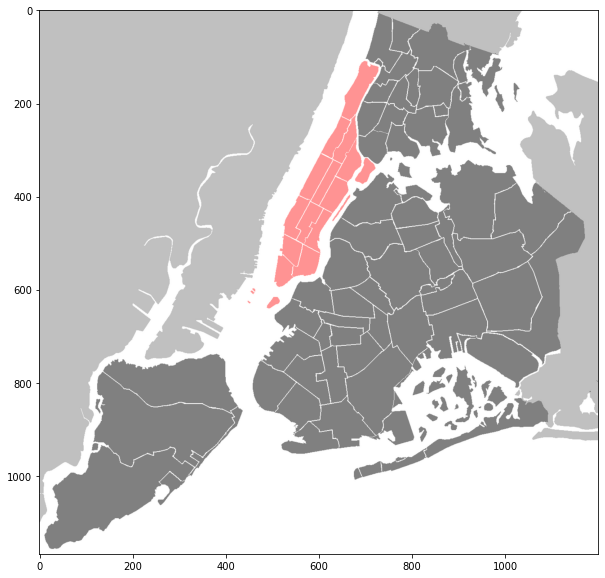

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
nyc = mpimg.imread('New_York_City_.png', 0)
plt.imshow(nyc)
plt.show()

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [8]:
profile

### Transformations 

Vous pouvez transformer les données comme bon vous semble (Data Cleaning - Data Preparation).

In [9]:
100 * data.isna().sum() / data.shape[0]

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [10]:
data.last_review.fillna(0, inplace = True)

In [11]:
data.reviews_per_month.fillna(0, inplace  = True)

In [12]:
data.price = data.price.replace({0: np.nan})

In [13]:
100 * data.isna().sum() / data.shape[0]

id                                0.000000
name                              0.032723
host_id                           0.000000
host_name                         0.042949
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.022497
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [14]:
data.dropna(inplace = True)

In [15]:
100 * data.isna().sum() / data.shape[0]

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

# Les données sont desormais nettoyées et prêtes a l'emploi

## Exploratory Data Analysis

### Questions requises

Pour chacune de ces questions, il vous est demandé d'analyser finement et de conserver et commenter les analyses / graphiques qui vous semblent pertinents.

#### Description des variables

Analysez et commentez les distributions des valeurs prises par les variables catégorielles et quantitatives.

In [16]:
data.describe()

id       host_id      latitude     longitude         price  \
count  4.884700e+04  4.884700e+04  48847.000000  48847.000000  48847.000000   
mean   1.902300e+07  6.763372e+07     40.728945    -73.952176    152.774705   
std    1.098410e+07  7.862959e+07      0.054529      0.046161    240.248498   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.475094e+06  7.814734e+06     40.690090    -73.983080     69.000000   
50%    1.968202e+07  3.079133e+07     40.723080    -73.955690    106.000000   
75%    2.915833e+07  1.074344e+08     40.763110    -73.936295    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48847.000000       48847.000000       48847.000000   
mean         7.012365          23.270621           1.091014   
std         20.021362          44.550647           1.597200   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48847.000000      48847.000000  
mean                         7.149016        112.799599  
std                         32.968270        131.615947  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [17]:
import seaborn as sns
sns.set(color_codes=True)

In [18]:
data.host_name.describe()

count       48847
unique      11448
top       Michael
freq          417
Name: host_name, dtype: object

In [19]:
data.name.describe()

count              48847
unique             47873
top       Hillside Hotel
freq                  18
Name: name, dtype: object

In [20]:
data.neighbourhood.describe()

count            48847
unique             221
top       Williamsburg
freq              3916
Name: neighbourhood, dtype: object

In [21]:
data.neighbourhood_group.describe()

count         48847
unique            5
top       Manhattan
freq          21642
Name: neighbourhood_group, dtype: object

In [22]:
data.room_type.describe()

count               48847
unique                  3
top       Entire home/apt
freq                25391
Name: room_type, dtype: object

In [23]:
data.host_name.describe()

count       48847
unique      11448
top       Michael
freq          417
Name: host_name, dtype: object

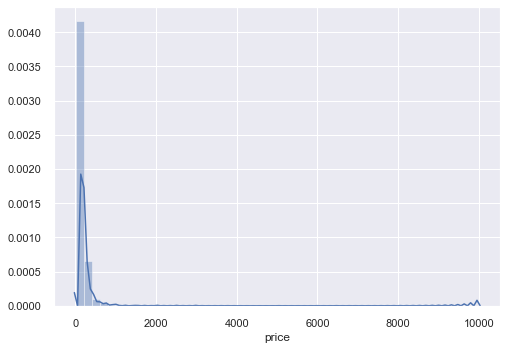

In [24]:
sns.distplot(data.price)

In [25]:
100* data[data.price < 500].shape[0] / data.shape[0]

97.47169734067599

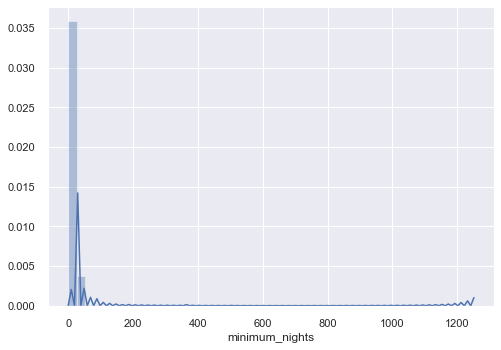

In [26]:
sns.distplot(data.minimum_nights)

In [27]:
100* data[data.minimum_nights < 100].shape[0] / data.shape[0]

99.61512477736606

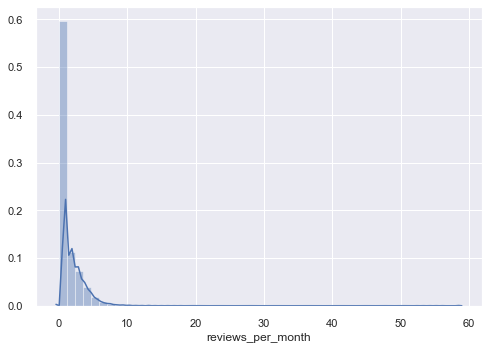

In [28]:
sns.distplot(data.reviews_per_month)

In [29]:
100* data[data.reviews_per_month < 5].shape[0] / data.shape[0]

96.82682662190103

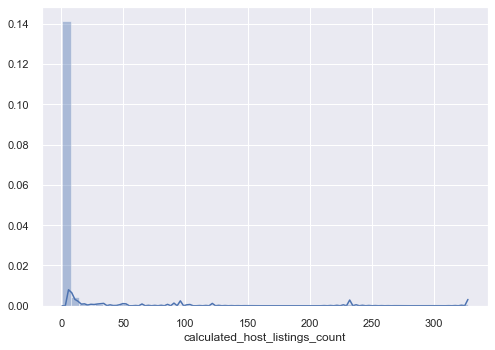

In [30]:
sns.distplot(data.calculated_host_listings_count)

In [31]:
100* data[data.calculated_host_listings_count < 10].shape[0] / data.shape[0]

93.49601817921264

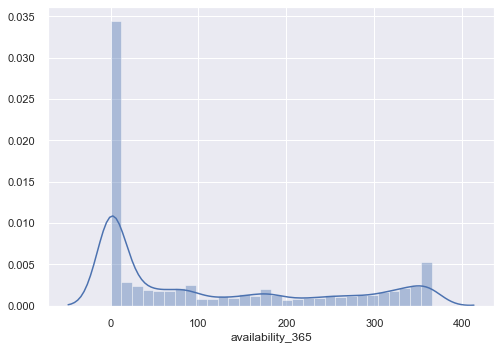

In [32]:
sns.distplot(data.availability_365)

In [33]:
100* data[data.availability_365 < 40].shape[0] / data.shape[0]

48.9241918643929

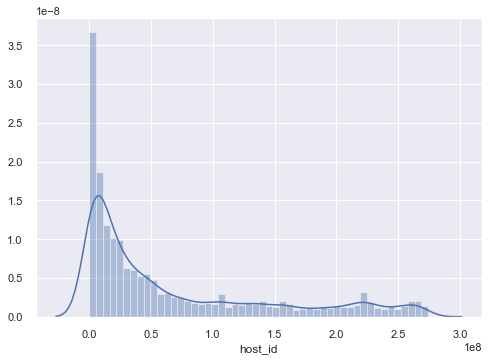

In [34]:
sns.distplot(data.host_id)

#### Impact sur le prix 

Analysez et commentez le rôle joué par les différentes variables sur le prix de location.

In [35]:
import numpy as np
data['logprice'] = np.log(data.price)

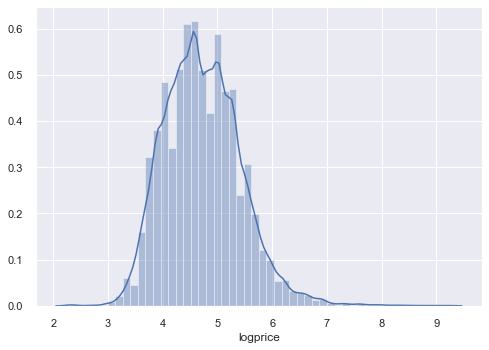

In [36]:
sns.distplot(data.logprice)


#### Corrélations 

Analysez et commentez les corrélations entre les différentes variables (quantitatives ? catégorielles ?).

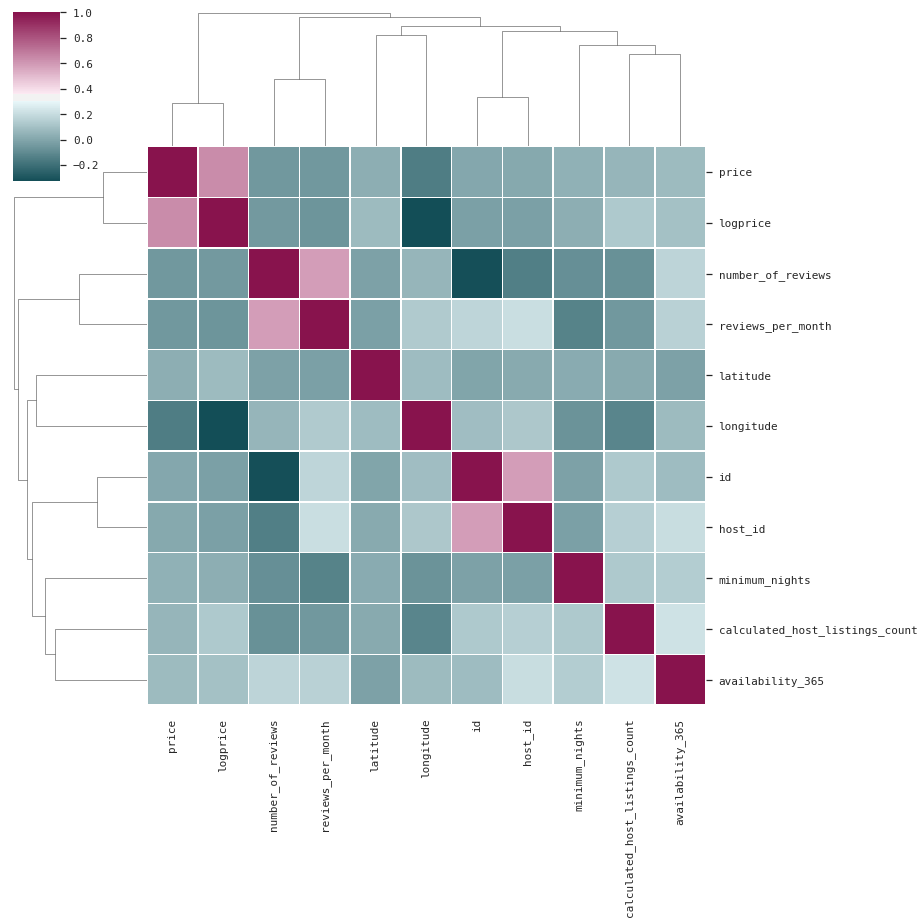

In [37]:
sns.set(font="monospace")
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
maps = sns.clustermap(data.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)
maps.savefig("correlation.png")

In [38]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

#### Géographie

Proposez une analyse intéressante et visuelle grâce à la carte de NYC.

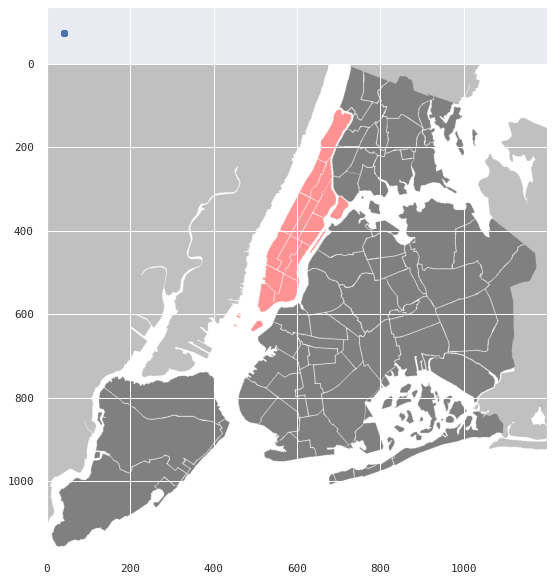

In [39]:
plt.rcParams["figure.figsize"] = (20,10)
nyc = mpimg.imread('New_York_City_.png', 0)
plt.scatter(x = data.latitude, y = data.longitude)
plt.imshow(nyc)
plt.show()

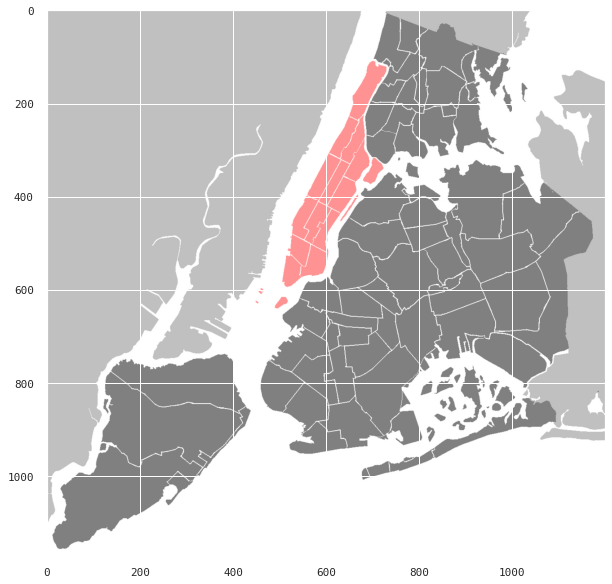

In [40]:
import matplotlib.pyplot as plt
img = plt.imread("New_York_City_.png",0)
fig, ax = plt.subplots()
ax.imshow(img)


### Analyses complémentaires 

## Prédiction du prix 

### Preprocessing

Vous pouvez préprocesser les données / créer des nouvelles variables pertinentes.

In [41]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'logprice'],
      dtype='object')

In [42]:
data.drop(['id','host_id','name','host_name'], inplace=True, axis=1)

In [43]:
data = pd.get_dummies(data, columns=['neighbourhood'])

In [44]:
data.head(5)

neighbourhood_group  latitude  longitude        room_type  price  \
0            Brooklyn  40.64749  -73.97237     Private room  149.0   
1           Manhattan  40.75362  -73.98377  Entire home/apt  225.0   
2           Manhattan  40.80902  -73.94190     Private room  150.0   
3            Brooklyn  40.68514  -73.95976  Entire home/apt   89.0   
4           Manhattan  40.79851  -73.94399  Entire home/apt   80.0   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   
1               1                 45  2019-05-21               0.38   
2               3                  0           0               0.00   
3               1                270  2019-07-05               4.64   
4              10                  9  2018-11-19               0.10   

   calculated_host_listings_count  ...  neighbourhood_Westerleigh  \
0                               6  ...                          0   
1                               2  ...                          0   
2                               1  ...                          0   
3                               1  ...                          0   
4                               1  ...                          0   

   neighbourhood_Whitestone  neighbourhood_Williamsbridge  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   neighbourhood_Williamsburg  neighbourhood_Willowbrook  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   neighbourhood_Windsor Terrace  neighbourhood_Woodhaven  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   neighbourhood_Woodlawn  neighbourhood_Woodrow  neighbourhood_Woodside  
0                       0                      0                       0  
1                       0                      0                       0  
2                       0                      0                       0  
3                       0                      0                       0  
4                       0                      0                       0  

[5 rows x 233 columns]

In [45]:
def encode_room(x):
    if x == 'Private room':
        return 0
    elif x=='Entire home/apt':
        return 1
    else: return 2
    
data.room_type = data.room_type.apply(encode_room)

In [46]:
from datetime import datetime
data.last_review = pd.to_datetime(data.last_review)

In [47]:
data['day'] = data.last_review.apply(lambda x: x.day)
data['month'] = data.last_review.apply(lambda x: x.month)
data['year']= data.last_review.apply(lambda x: x.year)

In [48]:
data.drop(['last_review'],axis=1,inplace = True)

In [49]:
data.head(5)

neighbourhood_group  latitude  longitude  room_type  price  minimum_nights  \
0            Brooklyn  40.64749  -73.97237          0  149.0               1   
1           Manhattan  40.75362  -73.98377          1  225.0               1   
2           Manhattan  40.80902  -73.94190          0  150.0               3   
3            Brooklyn  40.68514  -73.95976          1   89.0               1   
4           Manhattan  40.79851  -73.94399          1   80.0              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0               0.00                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  ...  neighbourhood_Williamsburg  \
0               365  ...                           0   
1               355  ...                           0   
2               365  ...                           0   
3               194  ...                           0   
4                 0  ...                           0   

   neighbourhood_Willowbrook  neighbourhood_Windsor Terrace  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   neighbourhood_Woodhaven  neighbourhood_Woodlawn  neighbourhood_Woodrow  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   

   neighbourhood_Woodside  day  month  year  
0                       0   19     10  2018  
1                       0   21      5  2019  
2                       0    1      1  1970  
3                       0    5      7  2019  
4                       0   19     11  2018  

[5 rows x 235 columns]

In [50]:
data = pd.get_dummies(data, columns=['neighbourhood_group'])

In [51]:
data.dtypes

latitude                             float64
longitude                            float64
room_type                              int64
price                                float64
minimum_nights                         int64
                                      ...   
neighbourhood_group_Bronx              uint8
neighbourhood_group_Brooklyn           uint8
neighbourhood_group_Manhattan          uint8
neighbourhood_group_Queens             uint8
neighbourhood_group_Staten Island      uint8
Length: 239, dtype: object

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_data = scaler.fit_transform(data)

In [53]:
df = pd.DataFrame(data=new_data, columns=data.columns)

In [54]:
df.head(5)

latitude  longitude  room_type     price  minimum_nights  \
0 -1.493796  -0.437464  -1.048071 -0.015712       -0.300301   
1  0.452513  -0.684426   0.799795  0.300631       -0.300301   
2  1.468489   0.222618  -1.048071 -0.011549       -0.200406   
3 -0.803336  -0.164289   0.799795 -0.265456       -0.300301   
4  1.275747   0.177342   0.799795 -0.302917        0.149224   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0          -0.320327          -0.551605                       -0.034853   
1           0.487751          -0.445167                       -0.156183   
2          -0.522346          -0.683086                       -0.186515   
3           5.538234           2.222028                       -0.186515   
4          -0.320327          -0.620476                       -0.186515   

   availability_365  logprice  ...  neighbourhood_Woodrow  \
0          1.916204  0.396483  ...              -0.004525   
1          1.840224  0.986757  ...              -0.004525   
2          1.916204  0.406063  ...              -0.004525   
3          0.616956 -0.341528  ...              -0.004525   
4         -0.857045 -0.494212  ...              -0.004525   

   neighbourhood_Woodside       day     month      year  \
0               -0.069528  0.586883  1.589406  0.493023   
1               -0.069528  0.774769 -0.036113  0.544204   
2               -0.069528 -1.104091 -1.336529 -1.963659   
3               -0.069528 -0.728319  0.614095  0.544204   
4               -0.069528  0.586883  1.914510  0.493023   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                  -0.150934                      1.196921   
1                  -0.150934                     -0.835477   
2                  -0.150934                     -0.835477   
3                  -0.150934                      1.196921   
4                  -0.150934                     -0.835477   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                      -0.891917                   -0.362164   
1                       1.121181                   -0.362164   
2                       1.121181                   -0.362164   
3                      -0.891917                   -0.362164   
4                       1.121181                   -0.362164   

   neighbourhood_group_Staten Island  
0                           -0.08772  
1                           -0.08772  
2                           -0.08772  
3                           -0.08772  
4                           -0.08772  

[5 rows x 239 columns]

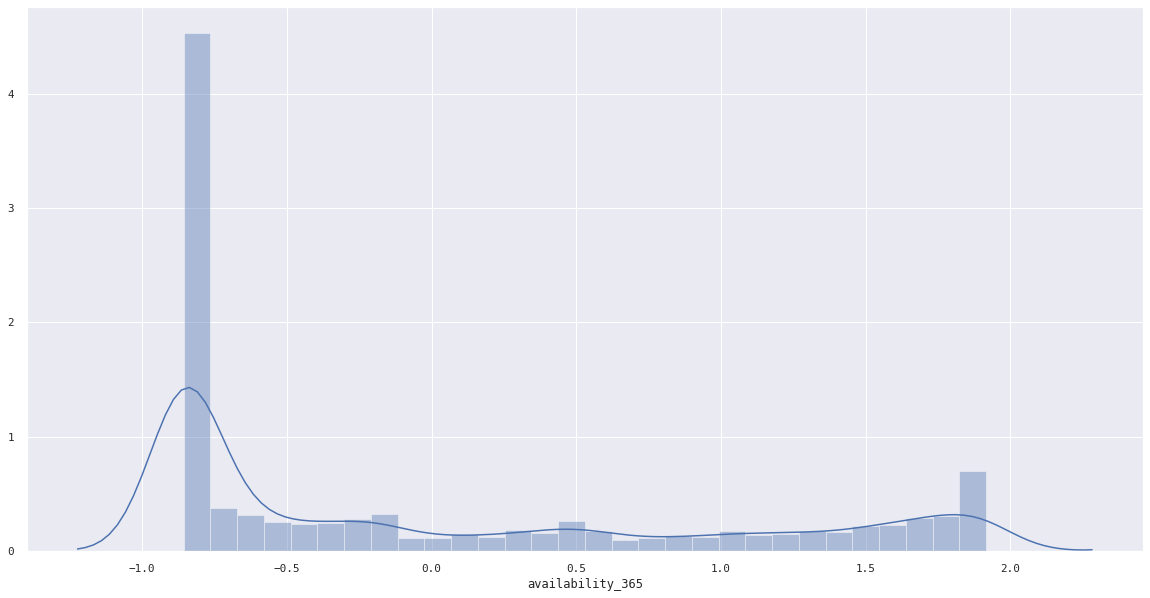

In [55]:
import seaborn as sns
sns.distplot(df.availability_365)

### Modèles

Vous devrez tester différents models (en appliquant un split Train Test à 70%) pour comparer leurs précisions (Root Mean Square Error - RMSE) et les discriminer (Bayesian Information Criteria - BIC).

Il vous est demandé de traiter a minima un modèle linéaire, et un modèle à base d'arbres. Cherchez également à analyser l'importance des différentes variables dans vos modèles.

#### Modèle selectionné et résultats

Expliquez ici pourquoi vous choisissez un certain modèle et ses résultats.

# Modele lineaire

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
target = 'logprice'

features = [col for col in df.columns if col not in ['logprice','price']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    test_size=0.3,
    random_state=42
)

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
result = lm.predict(X_test)

In [61]:
mean_squared_error(result, y_test)

0.5782974128518774

In [62]:
import numpy as np
np.sqrt(mean_squared_error(np.exp(result), np.exp(y_test)))

12.394008176146146

In [63]:
lm.intercept_

0.0012526538028120055

In [64]:
lm.coef_

array([-1.54542143e-02, -3.36686627e-01,  3.77112727e-01, -5.99951174e-02,
       -2.08864510e-02,  7.32726758e-03, -8.81702601e-03,  1.30485123e-01,
        1.40762625e+11, -1.79637417e+10, -4.11529395e+10, -3.62121045e+11,
       -1.22753533e+12, -3.57017548e+10,  1.91682545e+11, -1.02688670e+11,
       -1.01157928e+11, -1.27025437e+10,  5.74867029e+10, -2.57815981e+11,
       -1.70254989e+11, -5.07015589e+11, -1.16804722e+11, -1.54508631e+11,
        1.06426163e+11, -7.49441354e+10, -2.73839585e+10, -1.15010912e+11,
       -1.00856691e+11, -7.15316534e+10, -3.08884345e+11, -7.49441354e+10,
        9.46982212e+10, -1.07303865e+11, -6.70423797e+10, -2.20005501e+10,
       -4.18508062e+11, -2.10533899e+11, -1.04844315e+11, -1.31880437e+11,
        6.51824594e+10, -1.79637417e+10,  7.61231732e+11,  4.40717570e+11,
        9.21734240e+10,  1.66431436e+11,  1.14948685e+11,  9.95556182e+10,
       -3.47827189e+10, -2.05911639e+11,  3.07295081e+10, -8.60830683e+10,
       -1.79987893e+11, -

In [65]:
import time
from sklearn.linear_model import LassoLarsIC
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_
print(t_bic)
print(alpha_bic_)

0.4418759346008301
7.418049607557353e-05


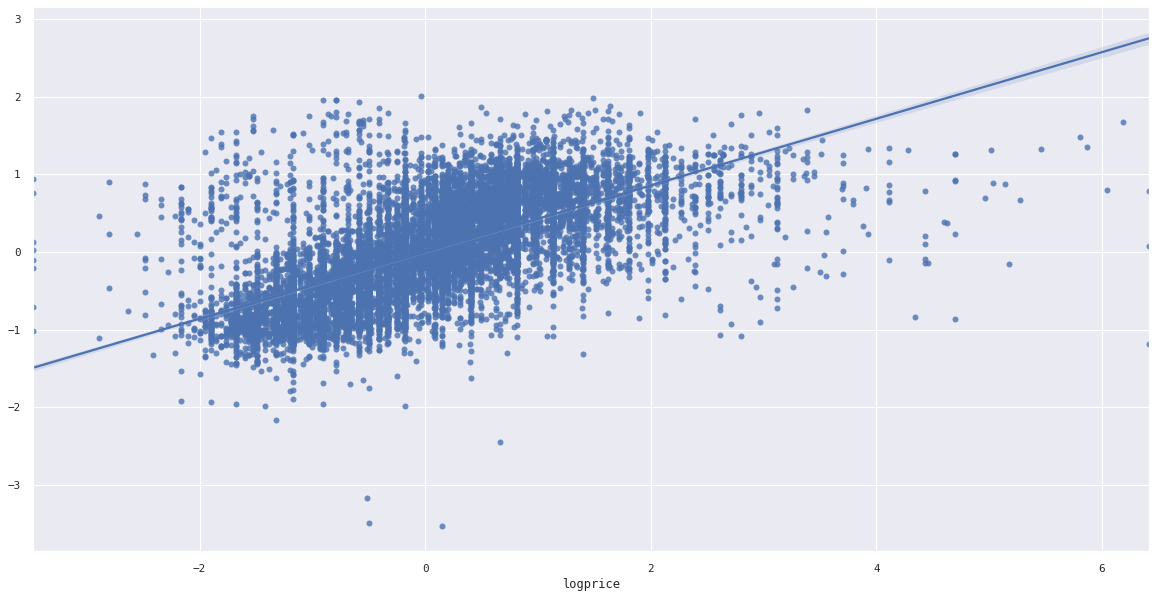

In [66]:
sns.regplot(x = y_test, y = result)

plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    data[features],
    data[target],
    test_size=0.3,
    random_state=42
)

In [68]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
result = lm2.predict(X_test)

In [70]:
mean_squared_error(result, y_test)

0.28181059210985226

In [71]:
np.sqrt(mean_squared_error(np.exp(result), np.exp(y_test)))

252.143888506107

In [72]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_
print(t_bic)
print(alpha_bic_)

0.3403639793395996
5.1795893444818164e-05


In [73]:
%config IPCompleter.greedy=True

# Modele d'arbre

In [74]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000, max_depth=6)

In [75]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
res = model.predict(X_test)

In [77]:
mean_squared_error(res, y_test)

0.22097714627262371

In [78]:
np.sqrt(mean_squared_error(np.exp(res), np.exp(y_test)))

250.0763973190213

In [79]:
mean_absolute_error(np.exp(res), np.exp(y_test))

61.2242138878997

In [80]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

In [81]:
feature_importances_md1 = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [82]:
feature_importances_md1

importance
room_type                          0.693039
longitude                          0.123515
latitude                           0.074010
availability_365                   0.035954
neighbourhood_group_Manhattan      0.021209
...                                     ...
neighbourhood_College Point        0.000000
neighbourhood_Midland Beach        0.000000
neighbourhood_Middle Village       0.000000
neighbourhood_Melrose              0.000000
neighbourhood_Claremont Village    0.000000

[237 rows x 1 columns]

In [83]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators = 1000, max_depth=6)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    test_size=0.3,
    random_state=42
)

In [85]:
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
res2=model2.predict(X_test)

In [87]:
mean_squared_error(np.exp(res2), np.exp(y_test))

153.50305380560667

In [88]:
mean_absolute_error(np.exp(res2), np.exp(y_test))

1.3314166180228053

In [89]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

In [90]:
feature_importances_md2 = pd.DataFrame(model2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [91]:
feature_importances_md2

importance
room_type                        0.692930
longitude                        0.123830
latitude                         0.073726
availability_365                 0.035862
neighbourhood_group_Manhattan    0.021354
...                                   ...
neighbourhood_Norwood            0.000000
neighbourhood_North Riverdale    0.000000
neighbourhood_Huguenot           0.000000
neighbourhood_NoHo               0.000000
neighbourhood_Emerson Hill       0.000000

[237 rows x 1 columns]